In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
mpl.rcParams['figure.figsize'] = (20,5)
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [2]:
# Read .csv dataset
members2019 = pd.read_csv('active-users-born-between-march-23-and-may-11-2019.fixed.augmented.csv')
members2020 = pd.read_csv('active-users-from-9M-600K-799K_during-lockdowns-2020.fixed.augmented.csv')

In [28]:
# French to English translation
members19 = members2019.replace(
    {'country': {"Cap Vert" : "Cape Verde Peninsula", "Ã‰quateur" : "Ecuador", "RÃ©union" : "Réunion", 
                 "Afghanistan" : "Afghanistan", "Albanie" : "Albania", "AlgÃ©rie" : "Algeria", 
                 "Samoa amÃ©ricaines" : "American Samoa", "Andorre" : "Andorra", "Angola" : "Angola",
                 "Antarctique" : "Antártica", "Argentine" : "Argentina", "ArmÃ©nie" : "Armenia", "Aruba" : "Aruba",
                 "Australie" : "Australia", "Autriche" : "Austria", "AzerbaÃ¯djan" : "Azerbaijan", "BahreÃ¯n" : "Bahrain",
                 "BiÃ©lorussie" : "Belarus", "Belgique" : "Belgium", "Benin" : "Benin", "Bermude" : "Bermuda", 
                 "Bhoutan" : "Bhutan", "Bolivie" : "Bolivia", "Bosnie et Herzegovine" : "Bosnia and Herzegovina", 
                 "BrÃ©sil" : "Brazil", "Brunei Darussalam" : "Brunei", "Bulgarie" : "Bulgaria", "Cambodge" : "Cambodia",
                 "Cameroun" : "Cameroon", "Canada" : "Canada", "ÃŽles Canaries" : "Canary Islands", 
                 "Iles Cayman" : "Cayman Islands", "Chili" : "Chile", "Chine" : "China", 
                 "St Martin" : "Collectivity of Saint Martin", "Colombie" : "Colombia", "Costa Rica" : "Costa Rica",
                 "Croatie" : "Croatia", "Chypre" : "Cyprus", "RÃ©publique tchÃ¨que" : "Czech Republic", 
                 "Danemark" : "Denmark", "Egypte" : "Egypt", "Le Salvador" : "El Salvador", 
                 "Equatorial Guinea" : "Equatorial Guinea", "Ã‰rythrÃ©e" : "Eritrea", "Estonie" : "Estonia", 
                 "Ã‰thiopie" : "Ethiopia", "Fidji" : "Fiji", "Finlande" : "Finland", "France" : "France",
                 "PolynÃ©sie FranÃ§aise" : "French Polynesia", "GÃ©orgie" : "Georgia", "Allemagne" : "Germany", 
                 "Ghana" : "Ghana", "GrÃ¨ce" : "Greece", "Groenland" : "Greenland", "Guadeloupe" : "Guadeloupe", 
                 "Guam" : "Guam", "Guernsey" : "Guernsey", "Honduras" : "Honduras", "Hong Kong" : "Hong Kong", 
                 "Hongrie" : "Hungary", "Islande" : "Iceland", "Inde" : "India", "IndonÃ©sie" : "Indonesia", 
                 "Iran" : "Iran", "Irak" : "Iraq", "Irlande" : "Ireland", "ÃŽle de Man" : "Isle of Man", 
                 "Israel" : "Israel", "Italie" : "Italy", "Cote D'Ivoire" : "Ivory Coast", "Japon" : "Japan", 
                 "Jersey" : "Jersey", "Jordanie" : "Jordan", "Kazakhstan" : "Kazakhstan", "Kenya" : "Kenya", 
                 "Kowait" : "Kuwait", "Lettonie" : "Latvia", "Liban" : "Lebanon", "Liechtenstein" : "Liechtenstein",
                 "Lituanie" : "Lithuania", "Luxembourg" : "Luxembourg", "Macau" : "Macau", "MacÃ©doine" : "Macedon", 
                 "Madagascar" : "Madagascar", "Malawi" : "Malawi",  "Malaisie" : "Malaysia", "Maldives" : "Maldives", 
                 "Malte" : "Malta", "Martinique" : "Martinique", "Mexique" : "Mexico", "Moldavie" : "Moldova", 
                 "Monaco" : "Monaco", "Mongolie" : "Mongolia", "Maroc" : "Morocco", "Mozambique" : "Mozambique", 
                 "Nepal" : "Nepal", "Pays-Bas" : "Netherlands", "Nouvelle CalÃ©donie" : "New Caledonia", 
                 "Nouvelle ZÃ©lande" : "New Zealand", "Nicaragua" : "Nicaragua", "Nigeria" : "Nigeria",
                 "CorÃ©e du Nord" : "North Korea", "NorvÃ¨ge" : "Norway", "Oman" : "Oman", "Pakistan" : "Pakistan",
                 "Panama" : "Panama", "Paraguay" : "Paraguay", "PÃ©rou" : "Peru", "Philippines" : "Philippines",
                 "Pologne" : "Poland", "Portugal" : "Portugal", "Puerto Rico" : "Puerto Rico", "Qatar" : "Qatar", 
                 "Roumanie" : "Romania", "Russie" : "Russia", "Rwanda" : "Rwanda", "St BarthÃ©lÃ©my" : "Saint Barthélemy",
                 "Saint Kitts et Nevis" : "Saint Kitts and Nevis", "Sainte Lucie" : "Saint Lucia", 
                 "Arabie Saoudite" : "Saudi Arabia", "SÃ©nÃ©gal" : "Senegal", "Serbie" : "Serbia", 
                 "Singapour" : "Singapore", "Slovaquie" : "Slovakia", "SlovÃ©nie" : "Slovenia", 
                 "Afrique du Sud" : "South Africa", "CorÃ©e du Sud" : "South Korea", "Espagne" : "Spain", 
                 "Sri Lanka" : "Sri Lanka", "SuÃ¨de" : "Sweden", "Suisse" : "Switzerland", "Syrie" : "Syria", 
                 "Taiwan" : "Taiwan", "Thailande" : "Thailand", "Trinidad et Tobago" : "Trinidad and Tobago", 
                 "Tunisie" : "Tunisia", "Turquie" : "Turkey", "Ukraine" : "Ukraine", 
                 "Ã‰mirats arabes unis" : "United Arab Emirates", "Royaume-Uni" : "United Kingdom", 
                 "Etats-Unis" : "United States", "ÃŽles Vierges (U.S.)" : "United States Virgin Islands", 
                 "Uruguay" : "Uruguay", "Uzbekistan" : "Uzbekistan", "Venezuela" : "Venezuela", "Viet Nam" : "Vietnam"}})

# Differnt countries in 2019 & 2020
members20 = members2020.replace(
    {'country' : {"Afghanistan" : "Afghanistan", "Albanie" : "Albania", "AlgÃ©rie" : "Algeria", 
                  "Samoa amÃ©ricaines" : "American Samoa", "Andorre" : "Andorra", "Angola" : "Angola", 
                  "Anguilla" : "Anguilla", "Antarctique" : "Antártica", "Antigua et Barbuda" : "Antigua and Barbuda", 
                  "Argentine" : "Argentina", "ArmÃ©nie" : "Armenia", "Australie" : "Australia", "Autriche" : "Austria",
                  "AzerbaÃ¯djan" : "Azerbaijan", "BahreÃ¯n" : "Bahrain", "Bangladesh" : "Bangladesh", 
                  "Barbade" : "Barbados", "BiÃ©lorussie" : "Belarus", "Belgique" : "Belgium", "Belize" : "Belize", 
                  "Benin" : "Benin", "Bermude" : "Bermuda", "Bolivie" : "Bolivia", 
                  "Bosnie et Herzegovine" : "Bosnia and Herzegovina", "Botswana" : "Botswana", "BrÃ©sil" : "Brazil", 
                  "Brunei Darussalam" : "Brunei", "Bulgarie" : "Bulgaria", "Burkina Faso" : "Burkina Faso", 
                  "Cambodge" : "Cambodia", "Cameroun" : "Cameroon", "Canada" : "Canada", 
                  "ÃŽles Canaries" : "Canary Islands", "RÃ©publique centrafricaine" : "Central African Republic",
                  "Chili" : "Chile", "Chine" : "China", "Colombie" : "Colombia", "Congo" : "Congo", 
                  "Costa Rica" : "Costa Rica", "Croatie" : "Croatia", "Chypre" : "Cyprus", 
                  "RÃ©publique tchÃ¨que" : "Czech Republic", "Danemark" : "Denmark", "Dominique" : "Dominica", 
                  "RÃ©publique dominicaine" : "Dominican Republic", "East Timor" : "Timor-Leste", 
                  "Ã‰quateur" : "Ecuador", "Egypte" : "Egypt", "Estonie" : "Estonia", "Ã‰thiopie" : "Ethiopia", 
                  "ÃŽles FÃ©roÃ©" : "Faroe Islands", "Fidji" : "Fiji", "Finlande" : "Finland", "France" : "France", 
                  "PolynÃ©sie FranÃ§aise" : "French Polynesia", "GÃ©orgie" : "Georgia", "Allemagne" : "Germany",
                  "Ghana" : "Ghana", "Gibraltar" : "Gibraltar", "GrÃ¨ce" : "Greece", "Guadeloupe" : "Guadeloupe", 
                  "Guam" : "Guam", "Guatemala" : "Guatemala", "Guernsey" : "Guernsey", "Guyana" : "Guyana", 
                  "Guyane" : "Guyana", "Haiti" : "Haiti", "Honduras" : "Honduras", "Hong Kong" : "Hong Kong", 
                  "Hongrie" : "Hungary", "Islande" : "Iceland", "Inde" : "India", "IndonÃ©sie" : "Indonesia", 
                  "Iran" : "Iran", "Irak" : "Iraq", "Irlande" : "Ireland", "ÃŽle de Man" : "Isle of Man", 
                  "Israel" : "Israel", "Italie" : "Italy", "Cote D'Ivoire" : "Ivory Coast", "Jamaique" : "Jamaica",
                  "Japon" : "Japan", "Jersey" : "Jersey", "Jordanie" : "Jordan", "Kazakhstan" : "Kazakhstan",
                  "Kenya" : "Kenya", "Kowait" : "Kuwait", "Kirghizistan" : "Kyrgyzstan", "Laos" : "Laos",
                  "Lettonie" : "Latvia", "Liban" : "Lebanon", 
                  "Iles mineures Ã©loignÃ©es des Ã‰tats-Unis" : "Lesser Remote Islands of The United States",
                  "Libye" : "Libya", "Liechtenstein" : "Liechtenstein", "Lituanie" : "Lithuania", 
                  "Luxembourg" : "Luxembourg", "Macau" : "Macau", "MacÃ©doine" : "Macedon", "Madagascar" : "Madagascar",
                  "Malaisie" : "Malaysia", "Malte" : "Malta", "Iles Marshall" : "Marshall Islands", 
                  "Martinique" : "Martinique", "Mauritanie" : "Mauritania", "Maurice" : "Mauritius", "Mayotte" : "Mayotte",
                  "RÃ©union" : "Réunion", "Mexique" : "Mexico", "Moldavie" : "Moldova", "Monaco" : "Monaco",
                  "Montserrat" : "Montserrat", "Maroc" : "Morocco", "Myanmar" : "Myanmar", "Nepal" : "Nepal", 
                  "Pays-Bas" : "Netherlands", "Antilles nÃ©erlandaises" : "Netherlands Antilles", 
                  "Nouvelle CalÃ©donie" : "New Caledonia", "Nouvelle ZÃ©lande" : "New Zealand", "Nigeria" : "Nigeria", 
                  "CorÃ©e du Nord" : "North Korea", "ÃŽles Mariannes du Nord" : "Northern Mariana Islands", 
                  "NorvÃ¨ge" : "Norway", "Oman" : "Oman", "Pakistan" : "Pakistan", "Panama" : "Panama", "PÃ©rou" : "Peru", 
                  "Philippines" : "Philippines", "Pologne" : "Poland", "Portugal" : "Portugal", 
                  "Puerto Rico" : "Puerto Rico", "Qatar" : "Qatar", "Roumanie" : "Romania", "Russie" : "Russia",
                  "Rwanda" : "Rwanda", "St BarthÃ©lÃ©my" : "Saint Barthélemy", 
                  "Saint Kitts et Nevis" : "Saint Kitts and Nevis", "San Marino" : "San Marino", 
                  "Arabie Saoudite" : "Saudi Arabia", "SÃ©nÃ©gal" : "Senegal", "Serbie" : "Serbia", 
                  "Singapour" : "Singapore", "Slovaquie" : "Slovakia", "SlovÃ©nie" : "Slovenia", "Somalie" : "Somalia", 
                  "Afrique du Sud" : "South Africa", "CorÃ©e du Sud" : "South Korea", "Espagne" : "Spain", 
                  "Sainte Lucie" : "Saint Lucia", "SuÃ¨de" : "Sweden", "Suisse" : "Switzerland", "Taiwan" : "Taiwan", 
                  "Thailande" : "Thailand", "Trinidad et Tobago" : "Trinidad and Tobago", "Tunisie" : "Tunisia", 
                  "Turquie" : "Turkey", "ÃŽles Turques-et-CaÃ¯ques " : "Turks and Caicos Islands", 
                  "Royaume-Uni" : "United Kingdom", "Ukraine" : "Ukraine", "Ã‰mirats arabes unis" : "United Arab Emirates",
                  "Etats-Unis" : "United States", "Uruguay" : "Uruguay", "Uzbekistan" : "Uzbekistan", 
                  "Venezuela" : "Venezuela", "Viet Nam" : "Vietnam", 
                  "ÃŽles Vierges (U.S.)" : "United States Virgin Islands","Wallis et Futuna" : "Wallis and Futuna"}})

# Join dataframes and add year column to filter
df19 = members19.fillna('N/A')
df19 = df19.assign(Year='2019')
df20 = members20.fillna('N/A')
df20 = df20.assign(Year='2020')
df = df19.append(df20)

# Rename columns
df = df.rename(columns={"languageCode" : "Language", 'id' : 'ID', 'country' : 'Country', 'civility' : 'Civility',
                        'productsWished' : 'Products Wished', 'productsSold' : 'Products Sold',
                        'productsLiked' : 'Products Liked', 'productsBought' : 'Products Bought',
                        'productsListed' : 'Products Listed', 'nbFollowers' : 'Followers', 'nbFollows' : 'Following',
                        'countryCode' : 'Country Code'})

# French to English translation 
df = df.replace({'Language': {'de' : 'German', 'en' : 'English', 'es' : 'Spanish', 'fr' : 'French', 
                                                'it' : 'Italian'}})

# Proper Case
df = df.replace({'Civility' : {'miss' : 'Miss', 'mrs' : 'Mrs', 'mr' : 'Mr'}})

# Add columns to aggergate user engagement
df['Engagement Total'] = (df['Products Wished'] + df['Products Sold'] + df['Products Liked'] + df['Products Bought'] + df[
    'Products Listed'] + df['Following'])

# Add columns to filter users with app
def f(row):
    if row['hasIosApp'] == True :
        val = 'IOS App'
    elif row['hasAndroidApp'] == True :
        val = 'Android App'
    else:
        val = 'No App'
    return val
df['App'] = df.apply(f, axis=1)

                    # Has App (0 or 1)
def f(column):
    if column['App'] == 'IOS App' :
        val = '1'
    elif column['App'] == 'Android App' :
        val = '1'
    else:
        val = '0'
    return val
df['Has App (0 or 1)'] = df.apply(f, axis=1)

# Add column to filter member types
                    # 4 types of members
def member_type(df):
    if ((df['Products Sold'] >=1) and (df['Products Bought'] >=1)):
        return 'Dealer'
    elif df['Products Sold'] >=1:
        return 'Seller'
    elif df['Products Bought'] >=1:
        return 'Buyer'
    elif df['Engagement Total'] >= 1:
        return 'User'
    else: 
        return 'Browser'
df['Member Type'] =  df.apply(member_type, axis=1)

# Defin cutoff varible
low = df['Engagement Total'].quantile(q=0.20, interpolation='midpoint')
mid = df['Engagement Total'].quantile(q=0.40, interpolation='midpoint')
high = df['Engagement Total'].quantile(q=0.60, interpolation='midpoint')
veryhigh = df['Engagement Total'].quantile(q=0.80, interpolation='midpoint')

# Add column of member activity level to filter
def activity(df):
    if df['Engagement Total'] < low:
        return 'Very Low'
    elif df['Engagement Total'] <= mid:
        return 'Low'
    elif df['Engagement Total'] <= high:
        return 'Medium'
    elif df['Engagement Total'] <= veryhigh:
        return 'High'
    elif df['Engagement Total'] > veryhigh:
        return 'Very High'
    return val
df['Activity Level'] = df.apply(activity, axis=1)

# Sub activity string to interger
def activity(df):
    if df['Engagement Total'] < low:
        return '1'
    elif df['Engagement Total'] <= mid:
        return '2'
    elif df['Engagement Total'] <= high:
        return '3'
    elif df['Engagement Total'] <= veryhigh:
        return '4'
    elif df['Engagement Total'] > veryhigh:
        return '5'
    return val
df['Activity'] = df.apply(activity, axis=1)

# Drop irrelevant columns
df = df.drop(['type', 'civilityId', 'lastActiveDate', 'lastActiveMonth', 'inscriptionDate',
                         'inscriptionDateTs', 'passRate', 'usuallyShipsWithin', 'sellerRating_badge', 
                         'sellerRating_tags_shipping', 'sellerRating_tags_conformity', 'sellerRating_tags_volume', 
                         'sellerRating_progress_conformity', 'sellerRating_progress_cx', 'sellerRating_progress_shipping',
                         'sellerRating_progress_volume', 'onVacationAtFetchTime', 'fetchDate', 'hasAnyApp', 'hasIosApp', 
                         'hasAndroidApp', 'prodsTotalCount', 'prodsSoldCount', 'likesOnAllProducts', 'likesOnSoldProducts', 'modeTopSoldProductCategory', 
                         'modeTopListedProductCategory', 'meanDaysToSell', 'minDaysToSell', 'maxDaysToSell'], axis = 1)
df = df.drop(['mood', 'birthDate', 'segment'], axis=1)
# 'prodsAmountTotal', 'prodsAmountSold'

In [26]:
# Need to translate french country names again
# df = df.replace(
#     {'country' :     }})

In [29]:
df.columns

Index(['ID', 'Country', 'Country Code', 'Language', 'Civility',
       'Products Wished', 'Products Sold', 'Products Liked', 'Products Bought',
       'Products Listed', 'Followers', 'Following', 'prodsAmountTotal',
       'prodsAmountSold', 'Year', 'Engagement Total', 'App',
       'Has App (0 or 1)', 'Member Type', 'Activity Level', 'Activity'],
      dtype='object')

In [30]:
# Filterd dataframes to aggergate
browsers = df[df['Member Type'] == 'Browser']
browsers19 = browsers[browsers['Year'] == '2019']
browsers20 = browsers[browsers['Year'] == '2020']
dealers = df[df['Member Type'] == 'Dealer']
dealers19 = dealers[dealers['Year'] == '2019']
dealers20 = dealers[dealers['Year'] == '2020']
users = df[df['Member Type'] == 'User']
users19 = users[users['Year'] == '2019']
users20 = users[users['Year'] == '2020']
sellers = df[df['Member Type'] == 'Seller']
sellers19 = sellers[sellers['Year'] == '2019']
sellers20 = sellers[sellers['Year'] == '2020']
buyers = df[df['Member Type'] == 'Buyer']
buyers19 = buyers[buyers['Year'] == '2019']
buyers20 = buyers[buyers['Year'] == '2020']

Text(0, 0.5, 'Growth Rate')

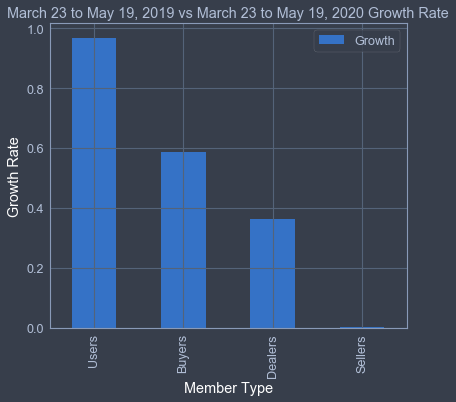

In [31]:
# # Aggergate growth rates from 2019 to 2020
# usersgrowth = -(len(users19) - len(users20))/ len(users19)
# sellersgrowth = -(len(sellers19) - len(sellers20))/ len(sellers19)
# buyersgrowth = -(len(buyers19) - len(buyers20))/ len(buyers19)
# browsersgrowth = -(len(browsers19) - len(browsers20))/ len(browsers19)

# Rate of growth formula ((2020/2019)-1)
usersgrowth = ((len(users20)/ len(users19)) - 1)
sellersgrowth = ((len(sellers20)/ len(sellers19)) - 1)
buyersgrowth = ((len(buyers20)/ len(buyers19)) - 1)
dealersgrowth =  ((len(dealers20)/ len(dealers19)) - 1)

# data viz of growth rate by member types
data = [['Users', usersgrowth], ['Buyers', buyersgrowth], ['Dealers', dealersgrowth], ['Sellers', sellersgrowth]]
membertypegrowth = pd.DataFrame(data, columns = ['Type', 'Growth'])
membertypegrowth.plot(x = 'Type', kind='bar')
plt.title('March 23 to May 19, 2019 vs March 23 to May 19, 2020 Growth Rate')
plt.xlabel('Member Type', color ='white')
plt.ylabel('Growth Rate', color ='white')
# 6 Browsers in 2019 to 22 in 2020- not worth investing to convert to users

In [22]:
df['Activity'].value_counts()

2    34910
3    22033
5    20165
4    18195
1     6242
Name: Activity, dtype: int64

Text(0.5, 1.0, 'Activity level count by country and language')

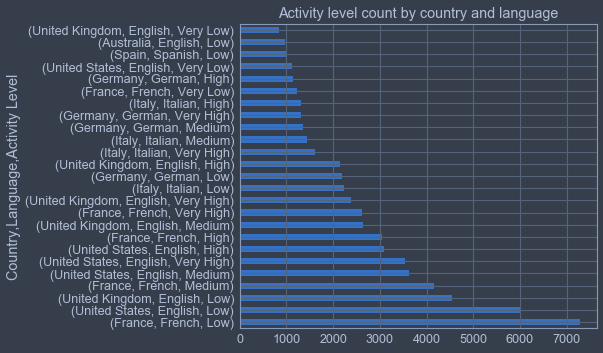

In [33]:
# total user activity levels by country and language 
df.groupby(['Country', 'Language'])['Activity Level'].value_counts().sort_values(ascending=False).head(25).plot(
    kind='barh')
plt.title('Activity level count by country and language')

Text(0.5, 1.0, 'Pie chart of user language count')

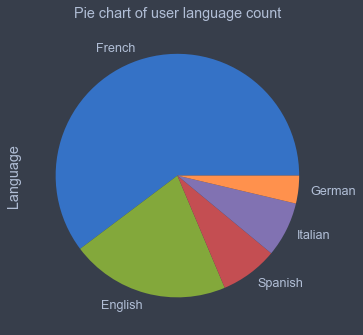

In [34]:
# total user language count
df['Language'].value_counts().plot.pie(labels=df['Language'].unique())
plt.title('Pie chart of user language count')

In [35]:
users = df[df['Member Type']=='User']
users['Activity Level'].value_counts()

Low          28069
Medium       17910
High         13479
Very High    11138
Very Low      3822
Name: Activity Level, dtype: int64

Text(0.5, 1.0, 'Pie chart of low engagement user language')

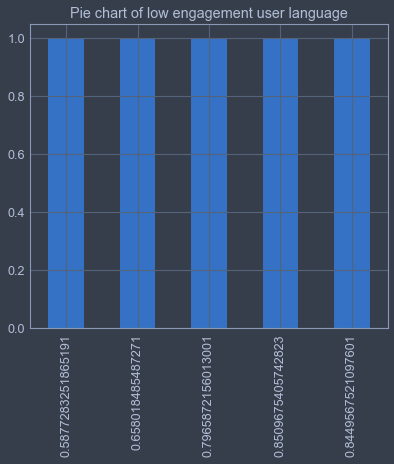

In [36]:
# low engagement user language growth
userlanguage19 = users[users['Year']=='2019']
userlanguage19 = userlanguage19[userlanguage19['Activity Level']== 'Low'].groupby(['Language'])["Engagement Total"
                                                                                                       ].sum()
userlanguage20 = users[users['Year']=='2020']
userlanguage20 = userlanguage20[userlanguage20['Activity Level']== 'Low'].groupby(['Language'])["Engagement Total"
                                                                                                       ].sum()
userlanguagegrowth = ((userlanguage20/ userlanguage19)- 1)

userlanguagegrowth.value_counts().plot(kind='bar')
plt.title('Pie chart of low engagement user language')
# edit df to use for chart and rename for clarity

In [37]:
print(df['Language'].value_counts())

English    61204
French     21408
German      7754
Italian     7429
Spanish     3750
Name: Language, dtype: int64


Text(0.5, 1.0, 'Low engagement user growth by country Top 25')

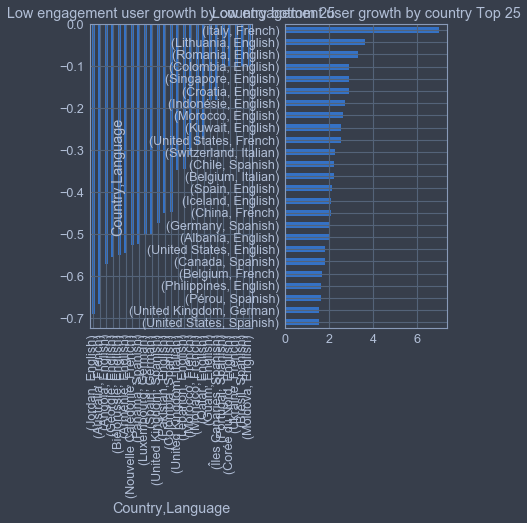

In [39]:
# Growth of 'Low Activity' users in bottom and top 15 countries
usercountries19 = users[users['Year']=='2019']
usercountries19 = usercountries19[usercountries19['Activity Level']== 'Low'].groupby(['Country', 'Language'])["Engagement Total"
                                                                                                       ].sum()
usercountries20 = users[users['Year']=='2020']
usercountries20 = usercountries20[usercountries20['Activity Level']== 'Low'].groupby(['Country', 'Language'])["Engagement Total"
                                                                                                       ].sum()
usergrowth = ((usercountries20/ usercountries19)- 1).dropna()
plt.subplot(1, 2, 1)
usergrowth.sort_values(ascending=True).head(25).plot(kind='bar')
plt.title('Low engagement user growth by country bottom 25')
plt.subplot(1, 2, 2)
usergrowth.sort_values(ascending=True).tail(25).plot(kind='barh')
plt.title('Low engagement user growth by country Top 25')
# edit df to use for chart and rename for clarity

In [41]:
# 1617 total users, 461 users in 2019 to 1156 users in 2020
topcountrygrowthusers = users[users['Country'].isin(['Saudi Arabia', 'Macau', 'Slovakia', 'South Africa', 'Lithuania',
                                                     'Philippines', 'Turkey', 'Ireland', 'Tunisia', 'Indonésie', 'Morocco', 
                                                     'Bahreïn', 'Serbia', 'Albania', 'Malaysia'])]
len(topcountrygrowthusers[topcountrygrowthusers['Year']== '2020'])

1156

Text(0.5, 1.0, 'User app growth by country Top 25')

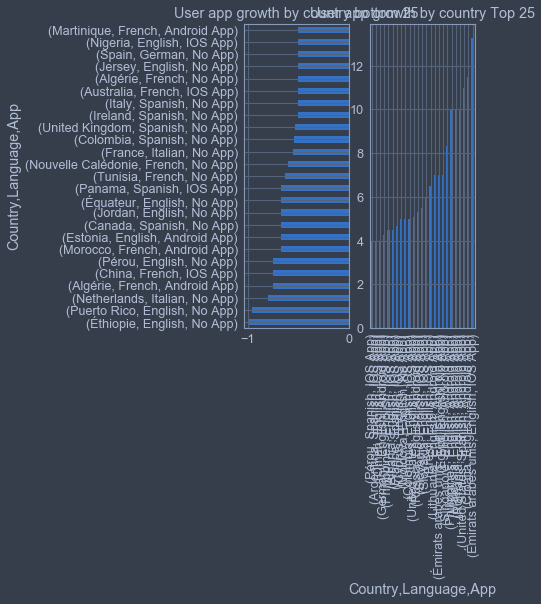

In [42]:
# Growth of users in bottom and top 15 countries
userapp19 = users[users['Year']=='2019']
['Activity Level']== 'Low'
userapp19 = userapp19.groupby(['Country', 'Language'])['App'].value_counts().sort_values(ascending=False)
userapp20 = users[users['Year']=='2020']
userapp20 = userapp20.groupby(['Country', 'Language'])['App'].value_counts().sort_values(ascending=False)

userappgrowth = ((userapp20/ userapp19)- 1).dropna()
plt.subplot(1, 3, 1)
userappgrowth.sort_values(ascending=True).head(25).plot(kind='barh')
plt.title('User app growth by country bottom 25')
plt.subplot(1, 3, 2)
userappgrowth.sort_values(ascending=True).tail(25).plot(kind='bar')
plt.title('User app growth by country Top 25')

In [43]:
df.to_csv("df.csv")

In [ ]:
users.to_csv("users.csv")

In [ ]:
df['country'].unique()

In [ ]:
# group app user 6 subplots gender and app type
# Marketing
# rentention
# AVG user 'engagement' vs AVG buyer 'engagement'
# ios/droid female/male
# sourcing local native language per more active user for target maerketing by
# identifing most active gender, language and country with the highest growth rate of activity